In [16]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
n_samples = 1000
X = np.random.uniform(-1, 1, (n_samples, 2))
y = np.sin(np.pi * X[:, 0]) + np.cos(np.pi * X[:, 1])
y = y.reshape(-1, 1)



In [17]:
input_size = 2
hidden_size = 10
output_size = 1
learning_rate = 0.01
epochs = 1000

W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))


In [18]:
def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu_derivative(x):
    return (x > 0).astype(float)

def sigmoid_derivative(x):
    return x * (1 - x)

loss_history = []


In [19]:
for epoch in range(epochs):
    z1 = np.dot(X, W1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, W2) + b2
    y_pred = z2

    loss = 0.5 * np.sum((y_pred - y) ** 2) / n_samples
    loss_history.append(loss)

    d_loss = (y_pred - y) / n_samples
    dW2 = np.dot(a1.T, d_loss)
    db2 = np.sum(d_loss, axis=0, keepdims=True)
    d_a1 = np.dot(d_loss, W2.T)
    d_z1 = d_a1 * relu_derivative(a1)
    dW1 = np.dot(X.T, d_z1)
    db1 = np.sum(d_z1, axis=0, keepdims=True)

    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")


Epoch 0, Loss: 1.926310880090037
Epoch 100, Loss: 0.47291192859584436
Epoch 200, Loss: 0.3255246080676419
Epoch 300, Loss: 0.24590013294577384
Epoch 400, Loss: 0.19097092989174458
Epoch 500, Loss: 0.15211499406457435
Epoch 600, Loss: 0.12555003323950326
Epoch 700, Loss: 0.10822630384701197
Epoch 800, Loss: 0.09692989190892498
Epoch 900, Loss: 0.0890906980496968


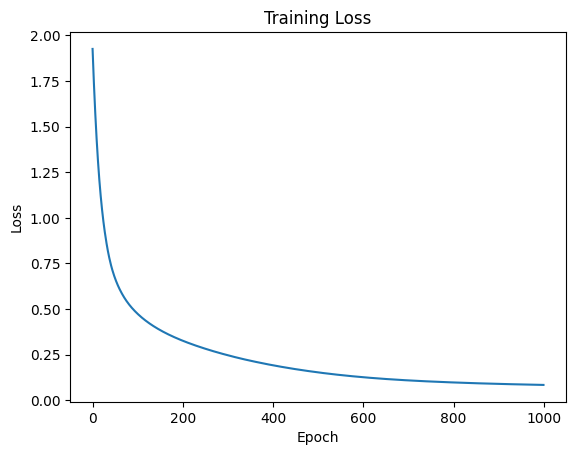

Final Predictions (first 10 samples):
[[-1.2581644 ]
 [ 1.25169281]
 [-1.02751028]
 [-1.14133618]
 [ 0.43477928]
 [-1.57908337]
 [ 0.53740617]
 [-0.87835473]
 [ 0.43962992]
 [ 0.10218111]]
True Values (first 10 samples):
[[-1.66158086]
 [ 1.80754965]
 [-1.38756533]
 [-1.02373971]
 [ 0.85383986]
 [-1.11115686]
 [ 0.63438181]
 [-1.31597776]
 [ 0.04544372]
 [-0.15852728]]


In [20]:
plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.show()

print("Final Predictions (first 10 samples):")
print(y_pred[:10])
print("True Values (first 10 samples):")
print(y[:10])